[[  0.          42.          33.01514804 ... 116.38728453 123.79418403
  129.69194269]
 [ 42.           0.          75.00666637 ... 111.22050171 137.3062271
  122.01639234]
 [ 33.01514804  75.00666637   0.         ... 129.32130528 121.59358536
  143.42245291]
 ...
 [116.38728453 111.22050171 129.32130528 ...   0.          57.07013229
   14.2126704 ]
 [123.79418403 137.3062271  121.59358536 ...  57.07013229   0.
   65.        ]
 [129.69194269 122.01639234 143.42245291 ...  14.2126704   65.
    0.        ]]


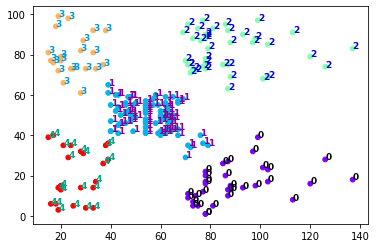

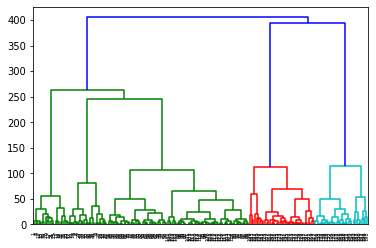

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from scipy.spatial import distance_matrix as dm
# to read data from a file from particular address
dataset=pd.read_csv('C:/Users/admin/Downloads/customers.csv')
# to make a dataset of the following coloumns 3,4  as a numpy array 
x= dataset.iloc[: , [3,4]].values
# to create a model of agglomerative clustering with no of cluster to form and also the linkage of the clustering
model =AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
# to fit the x values 
model.fit(x)
#labels_ returns an array of distinct categories
labels=model.labels_
# to get the distance as a matrix with every point
dist_matrix = dm(x,x) 
#used to print the  distance of each point from the other points in a form of matrix
print(dist_matrix)
# to create the minimum and maximum range of x 
x_min, x_max = np.min(x, axis=0), np.max(x, axis=0)
# to get the average distance of x
x1=(x - x_min) / (x_max - x_min)
# to display all the data points
for i in range(x1.shape[0]):
# Replace the data points with their respective cluster value 
# labels is a numpy array which have value from 0 to n_cluster-1 
    plt.text(x[i, 0], x[i, 1], str(labels[i]),
            color=plt.cm.nipy_spectral(labels[i] /10),
                fontdict={'weight': 'bold', 'size': 9})
# to display the cluster before clustering
plt.scatter(x[:, 0], x[:, 1],s=90, marker='.',c=labels,cmap='rainbow')
# to display the plot
plt.show()
#to make the dendrogaram
dend=sch.dendrogram(sch.linkage(x,method='ward'))
